# Laboratorio #4
Data Science - Universidad del Valle

- Maria Marta Ramirez 21342
- Gustavo Andres Gonzales 21438
---------------------------------------------------------------------------------------------

Importaciones

In [21]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from collections import Counter
import random

Cargar y organizar la data

In [22]:
train_dir = 'data/train'
test_dir = 'data/test'

# Obtener todas las rutas de imágenes en train y test
data_dir = 'data'
train_dir = os.path.join(data_dir, 'train')
test_dir = os.path.join(data_dir, 'test')

# Modalidades
modalities = ['m0', 'm1', 'm2', 'm3', 'm4']

### Informacion de la data

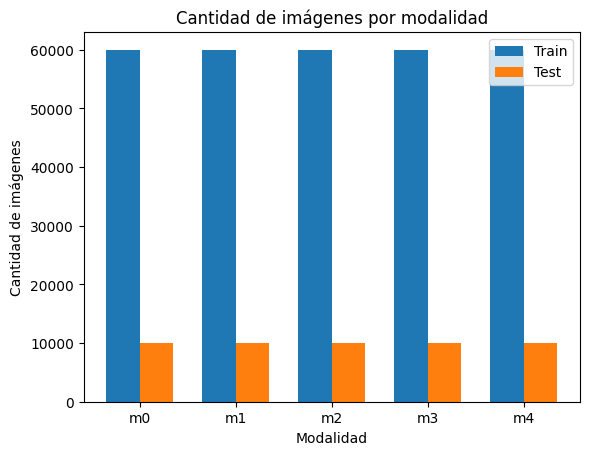

In [15]:
# Ver cantidad de imágenes por modalidad
train_modalities = []
test_modalities = []
for modality in modalities:
    train_modalities.append(len(os.listdir(os.path.join(train_dir, modality))))
    test_modalities.append(len(os.listdir(os.path.join(test_dir, modality))) if os.path.exists(os.path.join(test_dir, modality)) else 0) 

# Gráfico de barras
fig, ax = plt.subplots()
bar_width = 0.35
index = np.arange(len(modalities))
rects1 = ax.bar(index, train_modalities, bar_width, label='Train')
rects2 = ax.bar(index + bar_width, test_modalities, bar_width, label='Test')

ax.set_xlabel('Modalidad')
ax.set_ylabel('Cantidad de imágenes')
ax.set_title('Cantidad de imágenes por modalidad')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(modalities)
ax.legend()

plt.show()

Observamos:
- Hay mas cantidad de imagenes para entrenamiento que para prueba.
- Hace logica siendo que para el entrenamiento se necesita que el modelo tenga un buen aprendizaje.
- El entrenar el modelo va a ser tardado debido a la cantidad de imagenes para entrenar.

In [16]:
# Mas info de la data
print('Cantidad de imágenes en train:', sum(train_modalities))
print('Cantidad de imágenes en test:', sum(test_modalities))
print('Cantidad de imágenes en total:', sum(train_modalities) + sum(test_modalities))
print('Cantidad de imágenes por modalidad en train:', train_modalities)
print('Cantidad de imágenes por modalidad en test:', test_modalities)

# Verificar si hay imágenes repetidas
train_images = []
test_images = []
for modality in modalities:
    train_images += os.listdir(os.path.join(train_dir, modality))
    test_images += os.listdir(os.path.join(test_dir, modality)) if os.path.exists(os.path.join(test_dir, modality)) else [] 

print('Cantidad de imágenes repetidas en train:', len(train_images) - len(set(train_images)))
print('Cantidad de imágenes repetidas en test:', len(test_images) - len(set(test_images)))

Cantidad de imágenes en train: 300000
Cantidad de imágenes en test: 50000
Cantidad de imágenes en total: 350000
Cantidad de imágenes por modalidad en train: [60000, 60000, 60000, 60000, 60000]
Cantidad de imágenes por modalidad en test: [10000, 10000, 10000, 10000, 10000]
Cantidad de imágenes repetidas en train: 240000
Cantidad de imágenes repetidas en test: 40000


### Mostrar modalidades
Importante observar como se ven algunas imagenes para tener una idea de cómo se ven los datos.

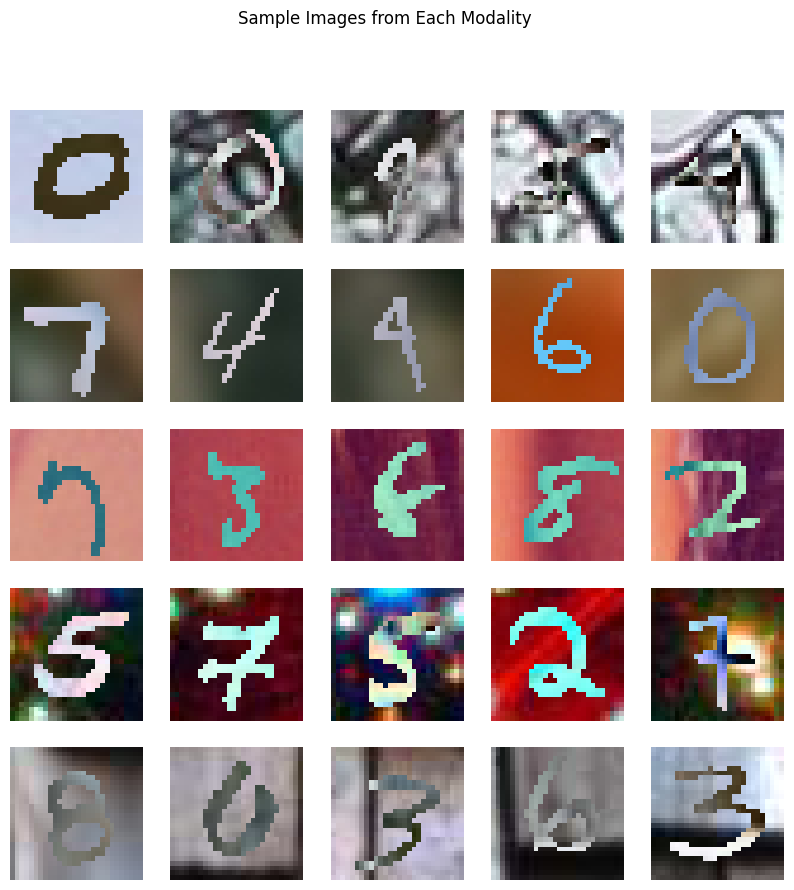

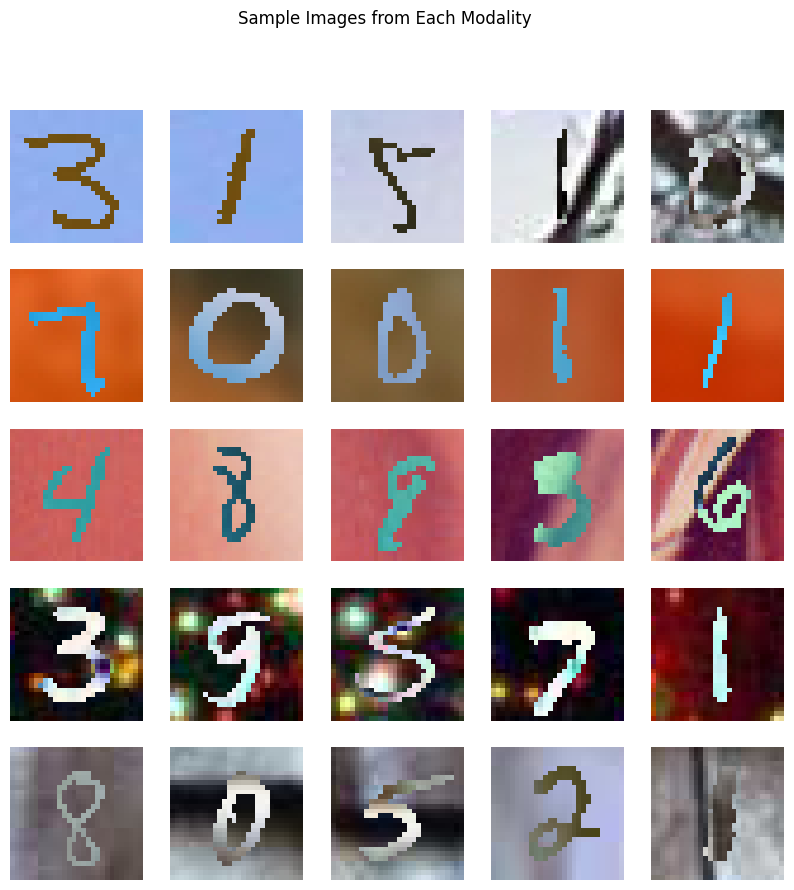

In [13]:
def show_sample_images(directory, modalities, num_samples=5):
    fig, axs = plt.subplots(len(modalities), num_samples, figsize=(num_samples * 2, len(modalities) * 2))
    for i, modality in enumerate(modalities):
        modality_dir = os.path.join(directory, modality)
        sample_images = np.random.choice(os.listdir(modality_dir), num_samples, replace=False)
        for j, img_name in enumerate(sample_images):
            img_path = os.path.join(modality_dir, img_name)
            img = Image.open(img_path)
            axs[i, j].imshow(img, cmap='gray')
            axs[i, j].axis('off')
    plt.suptitle('Sample Images from Each Modality')
    plt.show()

# Mostrar ejemplos de las modalidades en el conjunto de entrenamiento
show_sample_images(train_dir, modalities)

# Mostrar ejemplos de las modalidades en el conjunto de prueba
show_sample_images(test_dir, modalities)

Podemos observar las imagenes de cada modalidad.
- para train y para test.
- Las ultimas 2 filas muestran bastante semejanza en cuanto al estilo de las imagenes. 

### Análisis de la resolucion de las imagenes

In [23]:
def check_image_resolution_sampled(directory, modalities, sample_size=100):
    resolutions = []
    for modality in modalities:
        modality_dir = os.path.join(directory, modality)
        all_images = os.listdir(modality_dir)
        sampled_images = random.sample(all_images, min(sample_size, len(all_images)))
        for img_name in sampled_images:
            img_path = os.path.join(modality_dir, img_name)
            img = Image.open(img_path)
            resolutions.append(img.size)
    resolution_counts = Counter(resolutions)
    return resolution_counts

# Revisar la resolución en el conjunto de entrenamiento con una muestra de 100 imágenes por modalidad
train_resolutions = check_image_resolution_sampled(train_dir, modalities, sample_size=100)
print("Resoluciones encontradas en el conjunto de entrenamiento:", train_resolutions)

# Revisar la resolución en el conjunto de prueba con una muestra de 100 imágenes por modalidad
test_resolutions = check_image_resolution_sampled(test_dir, modalities, sample_size=100)
print("Resoluciones encontradas en el conjunto de prueba:", test_resolutions)

Resoluciones encontradas en el conjunto de entrenamiento: Counter({(28, 28): 500})
Resoluciones encontradas en el conjunto de prueba: Counter({(28, 28): 500})


Ambos conjuntos de datos presentan una única resolución de 28x28 píxeles, lo que asegura consistencia en el tamaño de las imágenes para el entrenamiento y prueba de modelos.

### Distribucion del conjunto de datos

In [27]:
def analyze_class_distribution_sampled(directory, modalities, sample_size=100):
    digit_counts = {modality: Counter() for modality in modalities}
    for modality in modalities:
        modality_dir = os.path.join(directory, modality)
        all_images = os.listdir(modality_dir)
        sampled_images = random.sample(all_images, min(sample_size, len(all_images)))
        for img_name in sampled_images:
            label = img_name.split('_')[0]  # Asumiendo que el nombre del archivo comienza con el dígito
            digit_counts[modality][label] += 1
    return digit_counts

# Distribución de clases en el conjunto de entrenamiento con una muestra de 100 imágenes por modalidad
train_distribution = analyze_class_distribution_sampled(train_dir, modalities, sample_size=100)

# Mostrar la distribución
print("Distribución de clases en el conjunto de entrenamiento:")
for modality, counts in train_distribution.items():
    print(f"Distribución de clases en {modality}: {counts}")

# Distribución de clases en el conjunto de prueba con una muestra de 100 imágenes por modalidad
test_distribution = analyze_class_distribution_sampled(test_dir, modalities, sample_size=100)

# Mostrar la distribución
print("Distribución de clases en el conjunto de prueba:")
for modality, counts in test_distribution.items():
    print(f"Distribución de clases en {modality}: {counts} ")



Distribución de clases en el conjunto de entrenamiento:
Distribución de clases en m0: Counter({'4272.3.png': 1, '1633.3.png': 1, '3691.1.png': 1, '5132.2.png': 1, '526.2.png': 1, '3676.9.png': 1, '646.3.png': 1, '168.9.png': 1, '3129.5.png': 1, '5557.9.png': 1, '1177.1.png': 1, '3509.8.png': 1, '3647.5.png': 1, '1876.8.png': 1, '638.7.png': 1, '5138.8.png': 1, '1932.2.png': 1, '4452.5.png': 1, '3880.0.png': 1, '2855.9.png': 1, '3676.7.png': 1, '2804.9.png': 1, '3275.2.png': 1, '3045.0.png': 1, '6100.1.png': 1, '4454.9.png': 1, '4123.1.png': 1, '564.1.png': 1, '5210.7.png': 1, '5688.3.png': 1, '1739.6.png': 1, '264.7.png': 1, '5790.2.png': 1, '1346.9.png': 1, '4217.9.png': 1, '3046.1.png': 1, '869.6.png': 1, '1444.7.png': 1, '4993.4.png': 1, '4768.3.png': 1, '5286.8.png': 1, '6200.7.png': 1, '1005.8.png': 1, '4291.8.png': 1, '2813.4.png': 1, '1201.2.png': 1, '3326.6.png': 1, '5296.5.png': 1, '2496.6.png': 1, '4787.3.png': 1, '968.5.png': 1, '2036.4.png': 1, '1374.6.png': 1, '4197.1.png'

1. Distribución de Clases en el Conjunto de Entrenamiento:
- m0 a m4: Cada imagen en los subconjuntos de m0 a m4 está representada una sola vez. Cada conjunto tiene una distribución de clases única basada en identificadores de imagen.

2. Observaciones
Cada clase está igualmente representada en cada conjunto, con una distribución uniforme de imágenes por clase. Lo que es bueno para entrenar el modelo de Deep Learning de manera efectiva, ya que asegura que cada clase tenga la misma influencia en el proceso de aprendizaje.

### Estan balanceados los datos?

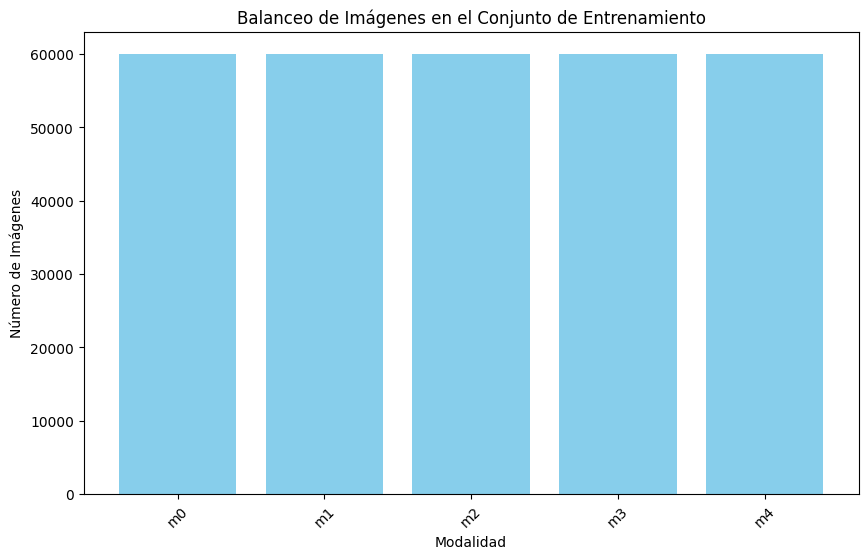

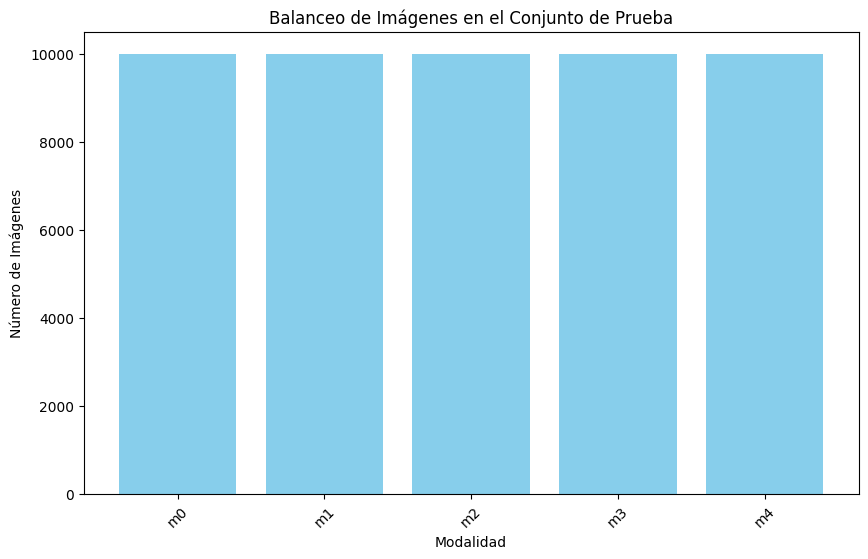

In [32]:
# Función para graficar el número de imágenes por modalidad
def graficar_balanceo(modalidades, titulo):
    modalidades_names = list(modalidades.keys())
    modalidades_counts = list(modalidades.values())
    
    plt.figure(figsize=(10, 6))
    plt.bar(modalidades_names, modalidades_counts, color='skyblue')
    plt.xlabel('Modalidad')
    plt.ylabel('Número de Imágenes')
    plt.title(titulo)
    plt.xticks(rotation=45)
    plt.show()

# Balanceo de imágenes en el conjunto de entrenamiento
train_modalities = {modality: len(os.listdir(os.path.join(train_dir, modality))) for modality in modalities}
graficar_balanceo(train_modalities, 'Balanceo de Imágenes en el Conjunto de Entrenamiento')

# Balanceo de imágenes en el conjunto de prueba
test_modalities = {modality: len(os.listdir(os.path.join(test_dir, modality))) if os.path.exists(os.path.join(test_dir, modality)) else 0 for modality in modalities}
graficar_balanceo(test_modalities, 'Balanceo de Imágenes en el Conjunto de Prueba')

El dataset esta balaceado.

## Modelos de Deep Learning